In [3]:
# Import Libraries


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [4]:
def model_result_style(name, accuracy_train, accuracy_test, matrix, report):
    print(f'{"-"*50}\n||--> {name}\n{"-"*50}')
    print(f'Train Accuracy Score is: {accuracy_train}')
    print(f'Test Accuracy Score is: {accuracy_test}')
    print("-"*30)
    print(f'classification Report of Test Data:\n {report}')
    print("-"*30)
    
    # Print Confiuision Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No PCOS', 'PCOS'], yticklabels=['No PCOS', 'PCOS'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"Confusion Matrix of {name}")
    plt.show()

In [5]:
# Load Data Set

df = pd.read_csv('data/pcos_rotterdam_balanceado.csv')
df.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,29,21.2,0,46.1,9,0
1,20,20.5,0,59.4,6,0
2,23,23.1,0,69.3,10,0
3,19,32.7,1,77.7,37,1
4,19,25.9,0,49.4,5,0


In [6]:
# Sepearte X and Y features

X = df.drop(columns=['PCOS_Diagnosis'])
y = df['PCOS_Diagnosis']

In [7]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Create Pipeline 

pipe = Pipeline(
    [   
        ('impute', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

In [9]:
# Apply Pipeline

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

In [10]:
# Initialize Models


models = {
    'Logistic Regression': LogisticRegression(),
    'KNN Classifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier()
}

In [11]:
scores = []

In [12]:
def evalueate_model(models, X_train, y_train, X_test, y_test):

    for name, item in models.items():

        model = item.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)

        report = classification_report(y_test, y_pred_test)
        matrix = confusion_matrix(y_test, y_pred_test)

        model_result_style(name, train_accuracy, test_accuracy, matrix, report)

        op = {
            'Model': name,
            'Test Accuracy': test_accuracy,
            'Recall Score': recall_score(y_test, y_pred_test)
        }
        scores.append(op)

--------------------------------------------------
||--> Logistic Regression
--------------------------------------------------
Train Accuracy Score is: 0.99875
Test Accuracy Score is: 0.9966666666666667
------------------------------
classification Report of Test Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       461
           1       1.00      0.99      0.99       139

    accuracy                           1.00       600
   macro avg       1.00      0.99      1.00       600
weighted avg       1.00      1.00      1.00       600

------------------------------


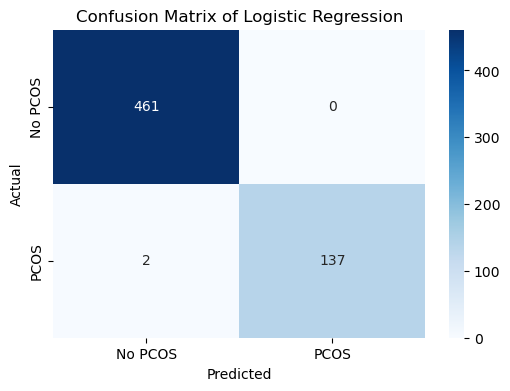

--------------------------------------------------
||--> KNN Classifier
--------------------------------------------------
Train Accuracy Score is: 0.9979166666666667
Test Accuracy Score is: 0.9983333333333333
------------------------------
classification Report of Test Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       461
           1       1.00      0.99      1.00       139

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

------------------------------


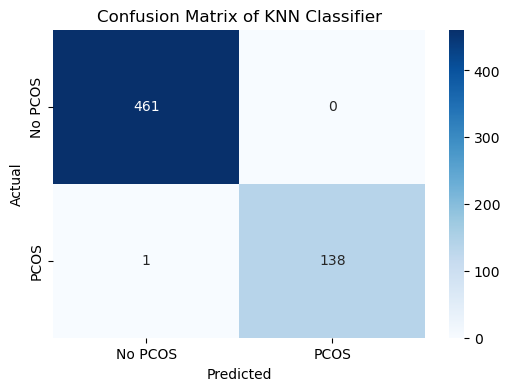

--------------------------------------------------
||--> SVC
--------------------------------------------------
Train Accuracy Score is: 0.9983333333333333
Test Accuracy Score is: 0.9983333333333333
------------------------------
classification Report of Test Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       461
           1       1.00      0.99      1.00       139

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

------------------------------


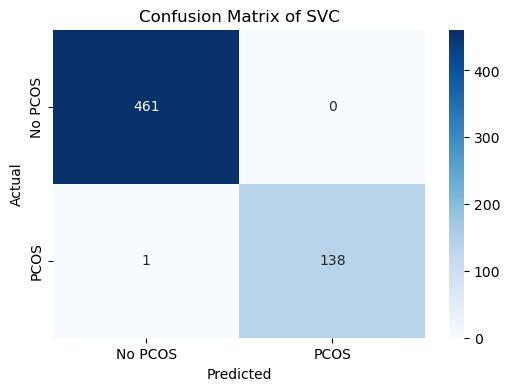

--------------------------------------------------
||--> Decision Tree
--------------------------------------------------
Train Accuracy Score is: 1.0
Test Accuracy Score is: 1.0
------------------------------
classification Report of Test Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       461
           1       1.00      1.00      1.00       139

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

------------------------------


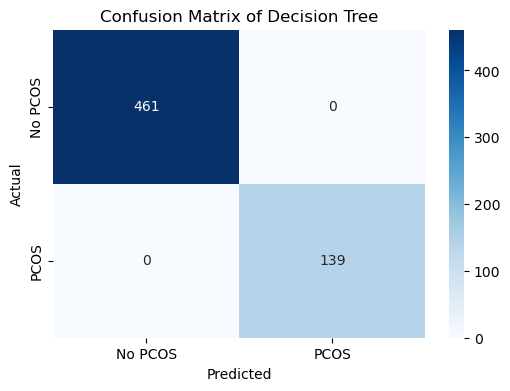

--------------------------------------------------
||--> Random Forest
--------------------------------------------------
Train Accuracy Score is: 1.0
Test Accuracy Score is: 1.0
------------------------------
classification Report of Test Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       461
           1       1.00      1.00      1.00       139

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

------------------------------


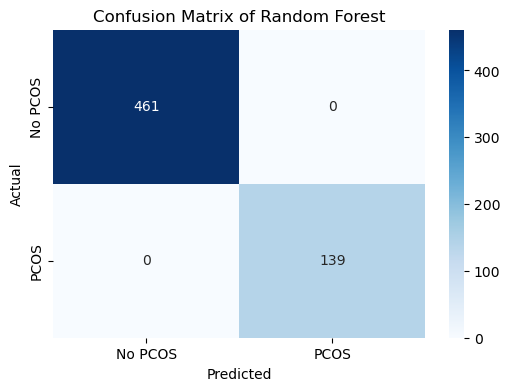

--------------------------------------------------
||--> Gradient Boosting
--------------------------------------------------
Train Accuracy Score is: 1.0
Test Accuracy Score is: 1.0
------------------------------
classification Report of Test Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       461
           1       1.00      1.00      1.00       139

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

------------------------------


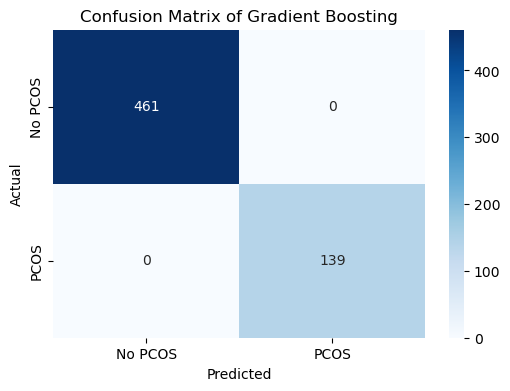

--------------------------------------------------
||--> Ada Boost
--------------------------------------------------
Train Accuracy Score is: 1.0
Test Accuracy Score is: 1.0
------------------------------
classification Report of Test Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       461
           1       1.00      1.00      1.00       139

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

------------------------------


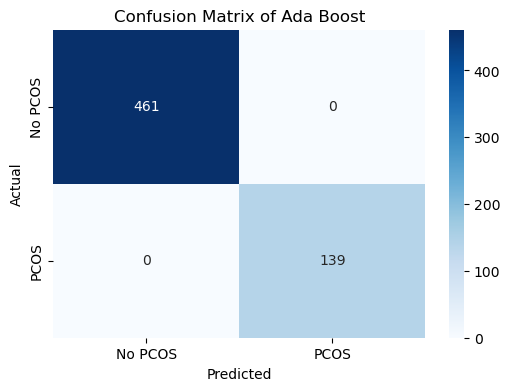

[23:30:04] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\Abu Bakar Tufail\anaconda3\envs\EDA_Kernel\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


--------------------------------------------------
||--> XGBoost
--------------------------------------------------
Train Accuracy Score is: 1.0
Test Accuracy Score is: 1.0
------------------------------
classification Report of Test Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       461
           1       1.00      1.00      1.00       139

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

------------------------------


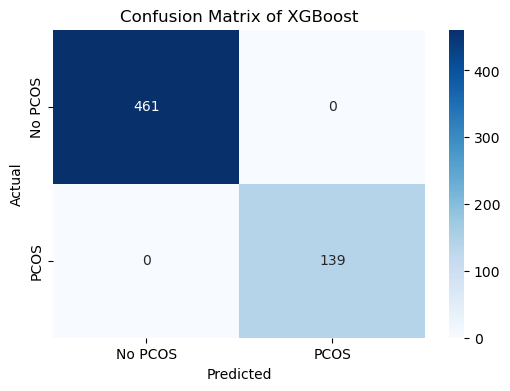

Learning rate set to 0.014972
0:	learn: 0.6483799	total: 158ms	remaining: 2m 38s
1:	learn: 0.6023290	total: 161ms	remaining: 1m 20s
2:	learn: 0.5637177	total: 164ms	remaining: 54.4s
3:	learn: 0.5261414	total: 166ms	remaining: 41.4s
4:	learn: 0.4874487	total: 169ms	remaining: 33.6s
5:	learn: 0.4540506	total: 172ms	remaining: 28.4s
6:	learn: 0.4251110	total: 175ms	remaining: 24.8s
7:	learn: 0.3950012	total: 177ms	remaining: 22s
8:	learn: 0.3660166	total: 180ms	remaining: 19.8s
9:	learn: 0.3383796	total: 183ms	remaining: 18.1s
10:	learn: 0.3135076	total: 185ms	remaining: 16.6s
11:	learn: 0.2922384	total: 189ms	remaining: 15.6s
12:	learn: 0.2688831	total: 192ms	remaining: 14.5s
13:	learn: 0.2526311	total: 195ms	remaining: 13.7s
14:	learn: 0.2354257	total: 198ms	remaining: 13s
15:	learn: 0.2204531	total: 202ms	remaining: 12.4s
16:	learn: 0.2070793	total: 207ms	remaining: 11.9s
17:	learn: 0.1920002	total: 209ms	remaining: 11.4s
18:	learn: 0.1791600	total: 212ms	remaining: 10.9s
19:	learn: 0.

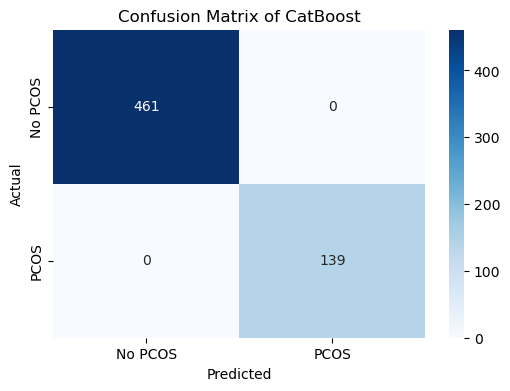

In [13]:
evalueate_model(models, X_train, y_train, X_test, y_test)

In [14]:
scores = pd.DataFrame(scores)
scores

,Model,Test Accuracy,Recall Score
0,Logistic Regression,0.996667,0.985612
1,KNN Classifier,0.998333,0.992806
2,SVC,0.998333,0.992806
3,Decision Tree,1.000000,1.000000
4,Random Forest,1.000000,1.000000
5,Gradient Boosting,1.000000,1.000000
6,Ada Boost,1.000000,1.000000
7,XGBoost,1.000000,1.000000
8,CatBoost,1.000000,1.000000


## Best Models
- Support Vector Classifier
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- AdaBoost Classifier
- XGBoost Classifier
- CatBoost Classifier

Recall and Accuracy score of all of these model is 1 on both Train and Test Data.

In [15]:
# Test New Data Point

point = {
    'Age': 29,
    'BMI': 24.4,
    'Menstrual_Irregularity': 1,
    'Testosterone_Level(ng/dL)': 54.2,
    'Antral_Follicle_Count': 12
}
# Actual ouput of this data point is: 1 (Yes PCOS).

In [16]:
transform_data = pipe.transform(pd.DataFrame([point]))

In [17]:
xgb = XGBClassifier()
model = xgb.fit(X_train, y_train)

c:\Users\Abu Bakar Tufail\anaconda3\envs\EDA_Kernel\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:09] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [18]:
y_pred = model.predict(transform_data)
print(y_pred)

[1]
